In [1]:


import pandas as pd
from tqdm import tqdm
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import axis
from sympy import rotations
import seaborn as sns
import matplotlib.dates as mdates
import datetime as dt

from matplotlib.pyplot import axis
from sympy import rotations

sns.set(style= 'whitegrid',font_scale = 2)


In [2]:
print('hi')

hi


In [3]:

plt.rc('axes', labelsize=25) #fontsize of the x and y labels
plt.rc('xtick', labelsize=25) #fontsize of the x tick labels
plt.rc('ytick', labelsize=25) #fontsize of the y tick labels
plt.rc('legend', fontsize=19) #fontsize of the legend

# sns.set(style= 'whitegrid',font_scale = 2)

def plot_time_series (daily_comments,daily_posts,daily_users,title):
    fig, axs = plt.subplots(3, 1, figsize=(9, 12),tight_layout=True,sharex=True)
    axs[2].tick_params(axis='x', rotation=45)
    axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    axs[2].xaxis.set_major_locator(mdates.MonthLocator(interval=3))

    


    #first the percentage
    axs[0].grid(True)
    #pd.concat([grouped_all_sentiment['rolling_average_second'],grouped_all_sentiment['rolling_average']], axis=0)
    sns.lineplot(data=(daily_comments['id']).rolling(window=14).mean(),  color = '#E69F00',ci=95,err_style="band",linewidth=3,ax=axs[0])
    sns.lineplot(data=(daily_posts['id']).rolling(window=14).mean(),  color = '#56B4E9',ci=95,err_style="band",linewidth=3,ax=axs[1])
    axs[0].set_ylabel('# of daily comments ')
    axs[1].set_ylabel('# of daily posts')
    #axs[0].set_yscale('log')
    axs[0].set_xlabel('')
    axs[1].set_xlabel('')
    axs[1].grid(True)
    #axs[0].legend()
    #axs[1].legend(loc = "upper center")

    axs[2].grid(True)
    sns.lineplot(data=daily_users.rolling(window=14).mean(),  color = '#D55E00',ci=95,err_style="band",linewidth=3,ax=axs[2])
    axs[2].set_ylabel('# of daily active users')
    axs[2].set_xlabel('')
    

    fig.suptitle(title,fontsize = 20)

In [4]:
comments = pd.read_json('DATASETS/FRANCE/france_comments_feb_dec.json')
posts = pd.read_json('DATASETS/FRANCE/france_posts_feb_dec.json')

In [5]:
comments_war  = pd.read_json('DATASETS/FRANCE/france_comments_war.json')

inter = set(comments_war['id']).intersection(set(comments['id']))
#we add a flag of war related comments to the dataset
tqdm.pandas()
comments['is_war'] = comments.progress_apply(lambda row: 1 if row['id'] in inter else 0 ,axis=1) # check if the id is in the comments that are about the war

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2185279/2185279 [00:27<00:00, 78278.80it/s]


In [6]:
comments['created_utc'] = pd.to_datetime(comments['created_utc'], unit='s')
posts['created_utc'] = pd.to_datetime(posts['created_utc'], unit='s')
#groupby
daily_comments = comments.groupby(comments['created_utc'].dt.date).count()
daily_posts = posts.groupby(posts['created_utc'].dt.date).count()
daily_users = comments[['created_utc','author']].groupby(comments['created_utc'].dt.date).author.nunique()

In [7]:
comments.head()

,subreddit,score_hidden,link_id,parent_id,gilded,id,body,author,score,edited,...,treatment_tags,top_awarded_type,comment_type,editable,collapsed_reason_code,retrieved_utc,author_is_blocked,unrepliable_reason,media_metadata,is_war
0,france,0,t3_sh9di0,t1_hv1gych,0,hv2cgmo,"Ca marche comment ? Plusieurs bulletins, jusqu...",MasterNebula,1,0,...,[],NaN,NaN,NaN,None,NaN,NaN,NaN,None,0
1,france,0,t3_sgzdlw,t1_huzqk0s,0,hv2ci5q,C'est beau d'être optimiste.,Johannes_P,3,0,...,[],NaN,NaN,NaN,None,NaN,NaN,NaN,None,0
2,france,0,t3_sh780r,t1_hv1ryd5,0,hv2cj6b,Ça ne m’étonne pas. J’étais chez Crédit Agrico...,Nico_La_440,15,0,...,[],NaN,NaN,NaN,None,NaN,NaN,NaN,None,0
3,france,0,t3_sftqja,t1_hv2b5po,0,hv2ck0s,La différence c'est que d'autres service peuve...,bziing,1,0,...,[],NaN,NaN,NaN,None,NaN,NaN,NaN,None,0
4,france,0,t3_sh11e6,t3_sh11e6,0,hv2ckjd,"Mon dieu, je ne pensais pas qu'on pourrait se ...",Lucienskyrim,1,0,...,[],NaN,NaN,NaN,None,NaN,NaN,NaN,None,0


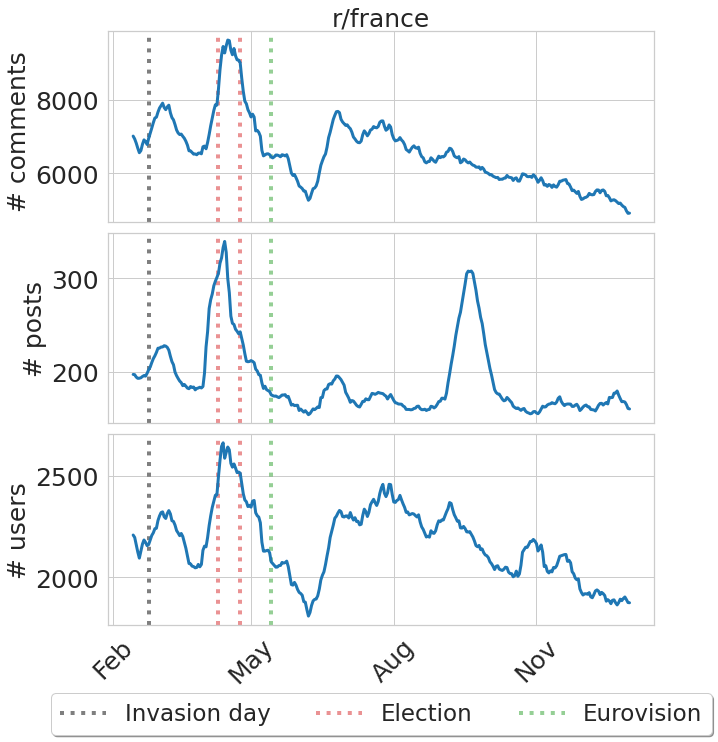

In [42]:
# plot_time_series(daily_comments,daily_posts,daily_users,'r/france')

title = "r/france"

fig, axs = plt.subplots(3, 1, figsize=(10, 10), sharex=True)
axs[2].tick_params(axis='x', rotation=45)
axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
axs[2].xaxis.set_major_locator(mdates.MonthLocator(interval=3))

for i in range(3):
    axs[i].axvline(x = dt.datetime(2022, 2, 24), color = 'black', label="Invasion day",
                   linestyle = ":", linewidth = 4,alpha = 0.5)
    axs[i].axvline(x = dt.datetime(2022, 4, 10), color = 'tab:red', linestyle = ":", linewidth = 4,alpha = 0.5)
    axs[i].axvline(x = dt.datetime(2022, 4, 24), color = 'tab:red', label = "Election", linestyle = ":", linewidth = 4,alpha = 0.5)
    axs[i].axvline(x = dt.datetime(2022, 5, 14), color = 'tab:green',label = "Eurovision", linestyle = ":", linewidth = 4,alpha = 0.5)

#first the percentage
axs[0].grid(True)
#pd.concat([grouped_all_sentiment['rolling_average_second'],grouped_all_sentiment['rolling_average']], axis=0)
sns.lineplot(data=(daily_comments['id']).rolling(window=14).mean(),  color = 'tab:blue',ci=95,err_style="band",linewidth=3,ax=axs[0])
sns.lineplot(data=(daily_posts['id']).rolling(window=14).mean(),  color = 'tab:blue',ci=95,err_style="band",linewidth=3,ax=axs[1])
axs[0].set_ylabel('# comments ')
axs[1].set_ylabel('# posts')
#axs[0].set_yscale('log')
axs[0].set_xlabel('')
axs[1].set_xlabel('')
axs[1].grid(True)
#axs[1].legend(loc = "upper center")

axs[2].grid(True)
sns.lineplot(data=daily_users.rolling(window=14).mean(),  color = 'tab:blue',ci=95,err_style="band",linewidth=3,ax=axs[2])
axs[2].set_ylabel('# users')
axs[2].set_xlabel('')

axs[0].get_legend().remove()
axs[1].get_legend().remove()


ax = axs[2]
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3),
          fancybox=True, shadow=True, ncol=3)

axs[0].set_title(title,fontsize=25)
plt.tight_layout()


### removed 

In [9]:
grouped_all_ = comments.groupby(comments['created_utc'].dt.date).count()
grouped_war_ = comments[comments['is_war']==True].groupby(comments['created_utc'].dt.date).count()
#we compute the percentage of daily war comments in r/france
grouped_all_['percentage'] = grouped_war_['created_utc']/grouped_all_['created_utc']
#fill nan with 0
grouped_all_['percentage'] = grouped_all_['percentage'].fillna(0)

grouped_all_removed = comments[comments['body']=='[removed]'].groupby(comments['created_utc'].dt.date).count()
#we compute the percentage of daily removed comments in r/france
grouped_all_removed['percentage'] = grouped_all_removed['created_utc']/grouped_all_['created_utc']
#fill nan with 0
grouped_all_removed['percentage'] = grouped_all_removed['percentage'].fillna(0)



### sentiment

In [10]:
comments_sentiment = pd.read_json('DATASETS/FRANCE/france_comments_w_sentiment.json')
#we remove deleted and removed comments
comments_sentiment = comments_sentiment[comments_sentiment['body'] != '[deleted]']
comments_sentiment = comments_sentiment[comments_sentiment['body'] != '[removed]']
from tqdm import tqdm
#add toxicity

toxicity_fr = pd.read_json('DATASETS/FRANCE/TOXICITY/france_toxicity_1.json')
for i in tqdm(range(1,1031, 1)):
    toxicity_fr = pd.concat([toxicity_fr,pd.read_json('DATASETS/FRANCE/TOXICITY/france_toxicity_'+str(i)+'.json')], ignore_index=True)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1030/1030 [01:02<00:00, 16.49it/s]


In [11]:
#we find posts about specific topics
#drop nan values
posts = posts.dropna(subset=['title'])
#search for the megathreads on the Eurovision festival 2022 
posts_eurovision = posts[posts['title'].str.contains('Eurovision',case=False)]
posts_elections = posts[posts['title'].str.contains('èlections|élection présidentielle',case=False)] # from google translate
#take 2022 content
posts_eurovision = posts_eurovision[posts_eurovision['created_utc'].datetime.astype('int64') <= 1668199806]
posts_elections = posts_elections[posts_elections['created_utc'].datetime.astype('int64')<= 1654982266]


AttributeError: 'Series' object has no attribute 'datetime'

In [12]:
#average daily
comments_sentiment['created_utc_x'] = pd.to_datetime(comments_sentiment['created_utc_x'],unit='ms')
grouped_all_sentiment = comments_sentiment.groupby(comments_sentiment['created_utc_x'].dt.date).mean(numeric_only=True)

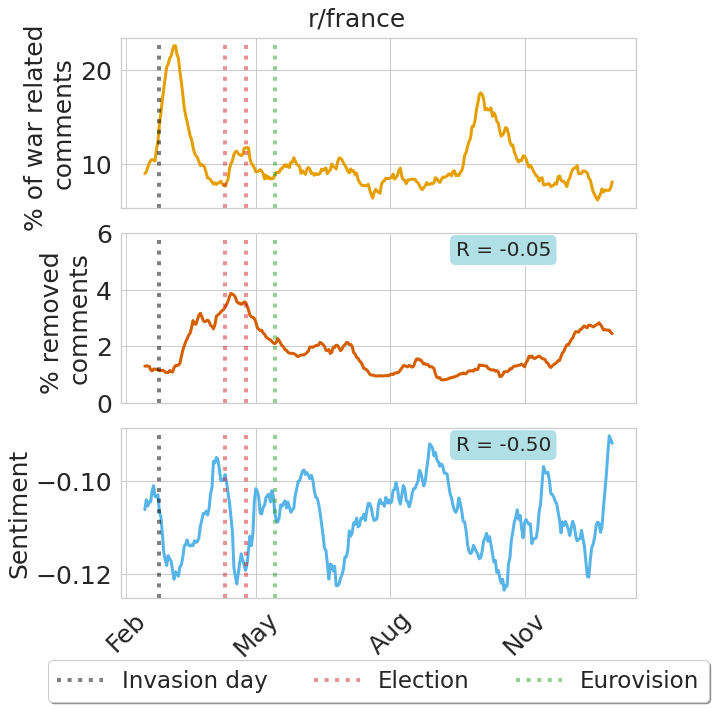

In [13]:
#split the plots of the time series

fig, axs = plt.subplots(3, 1, figsize=(10, 10),tight_layout=True,sharex = True)
axs[0].tick_params(axis='x', rotation=45)
axs[1].tick_params(axis='x', rotation=45)
axs[2].tick_params(axis='x', rotation=45)
axs[0].tick_params(axis='x', rotation=45)
axs[1].tick_params(axis='x', rotation=45)
axs[2].tick_params(axis='x', rotation=45)
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
axs[0].xaxis.set_major_locator(mdates.MonthLocator(interval=3))
axs[1].xaxis.set_major_locator(mdates.MonthLocator(interval=3))
axs[2].xaxis.set_major_locator(mdates.MonthLocator(interval=3))
axs[1].set_ylim(0,6)
plt.rc('legend', fontsize=23) #fontsize of the legend


#first the percentage
axs[0].grid(True)
#pd.concat([grouped_all_sentiment['rolling_average_second'],grouped_all_sentiment['rolling_average']], axis=0)
#axs[0].plot(grouped_all_['percentage']*100,color='#E69F00',marker='o',markersize=2,linestyle = 'none',alpha=0.4)
sns.lineplot(data=(grouped_all_['percentage']*100).rolling(window=14).mean(),  color = '#E69F00',ci=95,err_style="band",linewidth=3,ax=axs[0])
axs[0].set_xlabel('')
axs[0].set_ylabel('% of war related \ncomments')

#then the sentiment
axs[2].grid(True)
#axs[2].plot(grouped_all_sentiment['sentiment'],color='#56B4E9',marker='o', markersize=2,linestyle = 'none',alpha=0.4)
sns.lineplot(data=(grouped_all_sentiment['sentiment']).rolling(window=14).mean(),  color = '#56B4E9',ci=95,err_style="band",linewidth=3,ax=axs[2]).annotate(text='R = -0.50',
                                                                                                                                                            xy=(0.65, 0.9), xycoords='axes fraction',ha='left', va='center',bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'white'},fontsize = 20)
axs[2].set_ylabel('Sentiment')
axs[2].set_xlabel('')

#then the removed percentage
axs[1].grid(True)
#axs[1].plot(grouped_all_removed['percentage']*100,color='#D55E00',marker='o', markersize=2,linestyle = 'none',alpha=0.4)
sns.lineplot(data=(grouped_all_removed['percentage']*100).rolling(window=14).mean(),  color = '#D55E00',ci=95,err_style="band",linewidth=3,ax=axs[1]).annotate(text='R = -0.05',
                                                                                                                                                            xy=(0.65, 0.9), xycoords='axes fraction',ha='left', va='center',bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'white'},fontsize = 20)
axs[1].set_ylabel('% removed \ncomments')
axs[1].set_xlabel('')

for i in range(3):
    axs[i].axvline(x = dt.datetime(2022, 2, 24), color = 'black', label="Invasion day",
                   linestyle = ":", linewidth = 4,alpha = 0.5)
    axs[i].axvline(x = dt.datetime(2022, 4, 10), color = 'tab:red', linestyle = ":", linewidth = 4,alpha = 0.5)
    axs[i].axvline(x = dt.datetime(2022, 4, 24), color = 'tab:red', label = "Election", linestyle = ":", linewidth = 4,alpha = 0.5)
    axs[i].axvline(x = dt.datetime(2022, 5, 14), color = 'tab:green',label = "Eurovision", linestyle = ":", linewidth = 4,alpha = 0.5)

ax = axs[2]
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3),
          fancybox=True, shadow=True, ncol=3)


fig.suptitle('r/france',fontsize=25)

### boxplots

In [14]:
comments_sentiment['link_id'] = comments_sentiment['link_id'].str.replace('t3_','')
#filter by post - Eurovision
comments_eurovision = comments_sentiment[comments_sentiment['link_id'].isin(posts_eurovision['id'])]
#filter by post - election
comments_election = comments_sentiment[comments_sentiment['link_id'].isin(posts_elections['id'])]

#get war related comments and non war related
comments_war = comments_sentiment[comments_sentiment['is_war'] == True]
comments_no_war = comments_sentiment[comments_sentiment['is_war'] == False]

In [15]:
comments_war = comments_war[~comments_war['id'].isin(comments_election['id'])]
comments_no_war = comments_no_war[~comments_no_war['id'].isin(comments_election['id'])]

comments_war = comments_war[~comments_war['id'].isin(comments_eurovision['id'])]
comments_no_war = comments_no_war[~comments_no_war['id'].isin(comments_eurovision['id'])]

In [16]:
comments_election = comments_election.merge(toxicity_fr, left_on='id', right_on='id',how='left')
comments_eurovision = comments_eurovision.merge(toxicity_fr, left_on='id', right_on='id',how='left')
comments_war = comments_war.merge(toxicity_fr, left_on='id', right_on='id',how='left')
comments_no_war = comments_no_war.merge(toxicity_fr, left_on='id', right_on='id',how='left')

In [17]:
#group by day and average the sentiment
'''comments_election['created_utc'] = pd.to_datetime(comments_election['created_utc'],unit='ms')
comments_eurovision['created_utc'] = pd.to_datetime(comments_eurovision['created_utc'],unit='ms')
comments_war['created_utc'] = pd.to_datetime(comments_war['created_utc'],unit='ms')
comments_no_war['created_utc'] = pd.to_datetime(comments_no_war['created_utc'],unit='ms')
#then we groupby day'''
comments_election = comments_election.groupby(pd.Grouper(key='created_utc_x',freq='D')).mean(numeric_only=True)
comments_eurovision = comments_eurovision.groupby(pd.Grouper(key='created_utc_x',freq='D')).mean(numeric_only=True)
comments_war = comments_war.groupby(pd.Grouper(key='created_utc_x',freq='D')).mean(numeric_only=True)
comments_no_war = comments_no_war.groupby(pd.Grouper(key='created_utc_x',freq='D')).mean(numeric_only=True)

#drop the nan values
comments_election = comments_election.dropna()
comments_eurovision = comments_eurovision.dropna()
comments_war = comments_war.dropna()
comments_no_war = comments_no_war.dropna()

data_fr = pd.DataFrame({'war':comments_war['sentiment'],'no_war':comments_no_war['sentiment'],'eurovision':comments_eurovision['sentiment'],'election':comments_election['sentiment']})
data_fr_tox = pd.DataFrame({'war':comments_war['toxicity'],'no_war':comments_no_war['toxicity'],'eurovision':comments_eurovision['toxicity'],'election':comments_election['toxicity']})

In [18]:
pd.DataFrame.iteritems = pd.DataFrame.items
def plot_boxs(df,sub,measure):
    sns.set(style= 'whitegrid',font_scale = 2)
    plt.figure(figsize=(8, 7)).tight_layout()
    #sns.set_theme(style="white")
    #we plot the different distributions of the sentences
    #set the title 
    plt.title(f'{measure} distribution r/{sub}')
    plt.ylabel(measure)

    sns.boxplot(data=df, palette="colorblind", showcaps=True,showmeans=True,meanprops={"marker":"X","markerfacecolor":"red","markersize":"14","markeredgecolor":'black'},showfliers=False,width=0.6)
    plt.xticks([0,1,2,3],['War','Other','Eurovision','Elections'])


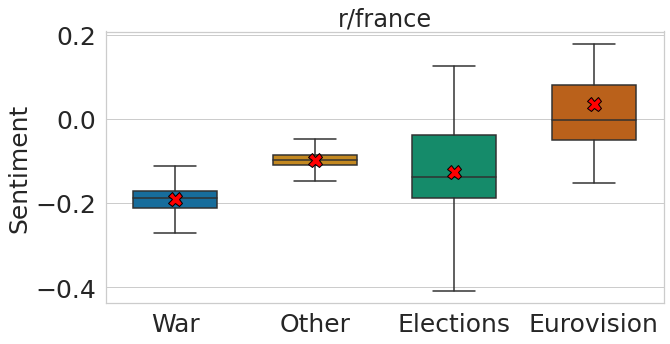

In [19]:
# plot_boxs(data_fr,'france','Sentiment')
df = data_fr.reset_index()
df = pd.melt(df, id_vars='created_utc_x', value_vars=['war', 'no_war','eurovision','election'])
sub = "france"
measure = "Sentiment"

plt.figure(figsize=(10, 5)).tight_layout()
#sns.set_theme(style="white")
#we plot the different distributions of the sentences
#set the title 
plt.title(f'r/{sub}')

sns.boxplot(x="variable", y="value", order=["war", "no_war", "election", "eurovision"], data=df, palette="colorblind", showcaps=True,showmeans=True,
            meanprops={"marker":"X","markerfacecolor":"red","markersize":"14","markeredgecolor":'black'},
            showfliers=False,width=0.6)
plt.xticks([0,1,2,3],['War','Other','Elections', 'Eurovision'])
plt.xlabel("")
plt.ylabel(measure)
plt.savefig(f"/home/ /THESIS/reddit_code/FRANCE/pdf/france_sent.pdf", format="pdf", bbox_inches="tight")

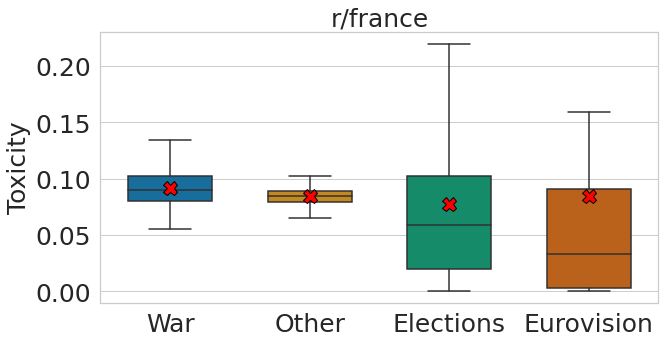

In [20]:
#plot_boxs(data_fr_tox,'france','Toxicity')
df = data_fr_tox.reset_index()
df = pd.melt(df, id_vars='created_utc_x', value_vars=['war', 'no_war','eurovision','election'])
sub = "france"
measure = "Toxicity"

plt.figure(figsize=(10, 5)).tight_layout()
#sns.set_theme(style="white")
#we plot the different distributions of the sentences
#set the title 
plt.title(f'r/{sub}',fontsize= 25)

sns.boxplot(x="variable", y="value", order=["war", "no_war", "election", "eurovision"], data=df, palette="colorblind", showcaps=True,showmeans=True,
            meanprops={"marker":"X","markerfacecolor":"red","markersize":"14","markeredgecolor":'black'},
            showfliers=False,width=0.6)
plt.xticks([0,1,2,3],['War','Other','Elections', 'Eurovision'])
plt.xlabel("")
plt.ylabel(measure)

In [21]:
'''data_fr.to_json('DATASETS/FRANCE/PLOTS/box_plots_sentiment.json')
data_fr_tox.to_json('DATASETS/FRANCE/PLOTS/box_plots_toxicity.json')'''

"data_fr.to_json('DATASETS/FRANCE/PLOTS/box_plots_sentiment.json')\ndata_fr_tox.to_json('DATASETS/FRANCE/PLOTS/box_plots_toxicity.json')"

In [22]:
df[df['variable']=='eurovision']['value'].median()

0.033150000000000006

### networks

In [23]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import networkx as nx
from tqdm import tqdm
ed_fr = pd.read_csv('DATASETS/FRANCE/GRAPHS/network_edges_all.csv')
G_france = nx.from_pandas_edgelist(ed_fr,create_using=nx.DiGraph(),source='Source',target='Target',edge_attr='size')

In [24]:
#we then will insert this info in the network
#we do the same for italia
def calc_info(network,comments):
    missing_nodes = []
    for node in tqdm(network.nodes()):
        try:
            network.nodes[node]['sentiment'] = comments.loc[node]['sentiment']
        except:
            missing_nodes.append(node)
    network.remove_nodes_from(missing_nodes)
def calc_neigh_info(network):
    to_remove = []
    for node in tqdm(network.nodes()):
        #we get the out degree
        out_degree = network.out_degree(node)
        #we get the neighbors
        neighbors = list(network.neighbors(node))
        #we get the total size of the edges
        total_size = sum([network.get_edge_data(node,neighbor)['size'] for neighbor in neighbors])
        if(len(neighbors) != 0):
            #we get the sentiment of the neighbors
            sentiment_neighbors = [network.nodes[neighbor]['sentiment'] for neighbor in neighbors]
            #we calculate the sentiment of the neighborhood
            neigh_sentiment = np.mean(sentiment_neighbors)
            #we add the attributes to the node
            network.nodes[node]['neigh_sentiment'] = neigh_sentiment
            network.nodes[node]['out_degree'] = out_degree
            network.nodes[node]['num_neighbours'] = len(neighbors)
            #nice 69!
        else:
            to_remove.append(node)
    network.remove_nodes_from(to_remove)

In [25]:
from matplotlib import tight_layout
from matplotlib.pyplot import xlim
from sympy import true
from matplotlib.lines import Line2D

def plot_histograms(title,labels,custom_lines,*dfs):
    
    topics = ['sentiment','age','gender','partisan']
    colors= ['olive','darkred','darkorange','blue']
    fig, axs = plt.subplots(1, 4, figsize=(17, 4),sharey=True,tight_layout=True)
    i=0
    j=0
    xlimt = [-1,1]
    for topic in topics: 
        if(i>0):
            xlimt=[-0.5,0.5] 
        for df in dfs:      
            g= sns.kdeplot(data=df,x=topic,color=colors[j],ax=axs[i],fill=False)
            g.set_xlim(xlimt[0],xlimt[1])
            j+=1
        j=0
        i+=1
    plt.suptitle(title,fontsize=20)
    fig.legend(custom_lines,labels, bbox_to_anchor=[0.96, 0],ncols=3)



/tmp/ipykernel_26640/3050717922.py:1: MatplotlibDeprecationWarning: The matplotlib.tight_layout module was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  from matplotlib import tight_layout


In [26]:
def annotate(r,p,g):
        g.ax_joint.annotate(f'$\\rho = {r:.3f}, p = {p:.3f}$',
                        xy=(0.1, 0.9), xycoords='axes fraction',
                        ha='left', va='center',
                        bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'},fontsize = 20)
from matplotlib.pyplot import xlim
import scipy.stats as stats
def plot_for_scores(data,topic,xlimit):
    neigh_topic = "neigh_"+topic
           
    plt.rc('axes', labelsize=25) #fontsize of the x and y labels
    plt.rc('xtick', labelsize=25) #fontsize of the x tick labels
    plt.rc('ytick', labelsize=25) #fontsize of the y tick labels
    plt.rc('legend', fontsize=20) #fontsize of the legend
    
    g=sns.jointplot(data=data, x=topic, y=neigh_topic,alpha=0.5,xlim=xlimit,ylim=xlimit).plot_joint(sns.kdeplot,fill=True, cmap="rocket", thresh=0 ,levels=50,alpha=1)
    #g.fig.suptitle("r/italia "+topic+" of the node vs "+topic+" of the neighborhood")
    r, p = stats.pearsonr(data[topic], data[neigh_topic])
    annotate(r,p,g) 
    plt.xlabel('Node '+topic)
    plt.ylabel('Neighborhood '+topic)   

In [27]:
def calc_attributes(network,scores):
    missing_nodes = []
    for node in tqdm(network.nodes()):
        #we do the same for the scores    
        try:
            network.nodes[node]['age'] = scores[scores['author'] == node]['age'].values[0]
            network.nodes[node]['gender'] = scores[scores['author'] == node]['gender'].values[0]
            network.nodes[node]['partisan'] = scores[scores['author'] == node]['partisan'].values[0]
            network.nodes[node]['comments_outside'] = scores[scores['author'] == node]['count'].values[0]
            
        except:
            missing_nodes.append(node)
    print("Missing nodes: ",len(missing_nodes))
    network.remove_nodes_from(missing_nodes)

def calc_neighbourhood_scores(network,attribute):
    #attribute is to choose the name of the weight attribute on the edges
    to_remove = []
    for node in tqdm(network.nodes()):
        out_degree = network.out_degree(node)
        #we get the neighbors
        neighbors = list(network.neighbors(node))
        if(len(neighbors) != 0):
            #we get the age score of the neighbors
            age_neighbors = [network.nodes[neighbor]['age'] for neighbor in neighbors]
            #we get the gender score of the neighbors
            gender_neighbors = [network.nodes[neighbor]['gender'] for neighbor in neighbors]
            #we get the partisanship score of war comments of the neighbors
            partisan_neighbors = [network.nodes[neighbor]['partisan'] for neighbor in neighbors]
            #we perform the weighted average of the neighbour scores
            weight_age_neighbors = [network.nodes[neighbor]['age']*network.get_edge_data(node,neighbor)['size'] for neighbor in neighbors]
            weight_gender_neighbors = [network.nodes[neighbor]['gender']*network.get_edge_data(node,neighbor)['size'] for neighbor in neighbors]
            weight_partisan_neighbors = [network.nodes[neighbor]['partisan']*network.get_edge_data(node,neighbor)['size'] for neighbor in neighbors]

            #we calculate the weighted average of the scores
            w_age_neighbors = np.sum(weight_age_neighbors)/sum([network.get_edge_data(node,neighbor)['size'] for neighbor in neighbors])
            w_gender_neighbors = np.sum(weight_gender_neighbors)/sum([network.get_edge_data(node,neighbor)['size'] for neighbor in neighbors])
            w_partisan_neighbors = np.sum(weight_partisan_neighbors)/sum([network.get_edge_data(node,neighbor)['size'] for neighbor in neighbors])

            age_neighbors = np.mean(age_neighbors)
            gender_neighbors = np.mean(gender_neighbors)
            partisan_neighbors = np.mean(partisan_neighbors)
            #we add the attributes to the node
            network.nodes[node]['neigh_age'] = w_age_neighbors
            network.nodes[node]['neigh_gender'] = w_gender_neighbors
            network.nodes[node]['neigh_partisan'] = w_partisan_neighbors
            network.nodes[node]['w_neigh_age'] = w_age_neighbors
            network.nodes[node]['w_neigh_gender'] = w_gender_neighbors
            network.nodes[node]['w_neigh_partisan'] = w_partisan_neighbors
            network.nodes[node]['out_degree'] = out_degree
            network.nodes[node]['num_neighbours'] = len(neighbors)
        else:
            to_remove.append(node)
    network.remove_nodes_from(to_remove)

In [28]:
#we load the scores
france_info_war = pd.read_json('DATASETS/FRANCE/GRAPHS/france_info_war.json')
france_scores_info_war = pd.read_json('DATASETS/FRANCE/GRAPHS/france_scores_info_war.json')

In [29]:
france_scores_info_war.loc[len(france_scores_info_war.index)] = [-0.3,-0.3,-0.3,0,-0.3,-0.3,-0.3,0,0,0,0,0]
france_scores_info_war.loc[len(france_scores_info_war.index)] = [-0.3,-0.3,-0.3,0,0.3,0.3,0.3,0,0,0,0,0]
france_scores_info_war.loc[len(france_scores_info_war.index)] = [0.3,0.3,0.3,0,-0.3,-0.3,-0.3,0,0,0,0,0]
france_scores_info_war.loc[len(france_scores_info_war.index)] = [0.3,0.3,0.3,0,0.3,0.3,0.3,0,0,0,0,0]

In [30]:
france_info_war.loc['test1'] = [-1,-1,0,0]
france_info_war.loc['test2'] = [-1,1,0,0]
france_info_war.loc['test3'] = [1,-1,0,0]
france_info_war.loc['test4'] = [1,1,0,0]

In [31]:
user_sentiment = comments_sentiment.groupby(by=['author']).mean(numeric_only=True)

In [32]:
G_france_scores = nx.from_pandas_edgelist(ed_fr,create_using=nx.DiGraph(),source='Source',target='Target',edge_attr='size')

In [33]:
scores_users = pd.read_csv('DATASETS/FRANCE/PREV_ACTIVITY/fr_new_scores_users.csv')

In [34]:
calc_info(G_france,user_sentiment)
calc_neigh_info(G_france)
calc_attributes(G_france_scores,scores_users)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 52441/52441 [05:15<00:00, 166.20it/s]


Missing nodes:  22922


In [35]:
calc_neighbourhood_scores(G_france_scores,'age')
calc_neighbourhood_scores(G_france_scores,'gender')
calc_neighbourhood_scores(G_france_scores,'partisan')

  1%|█▍                                                                                                                                                                                | 230/29519 [00:00<00:37, 780.59it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24973/24973 [00:04<00:00, 5856.43it/s]


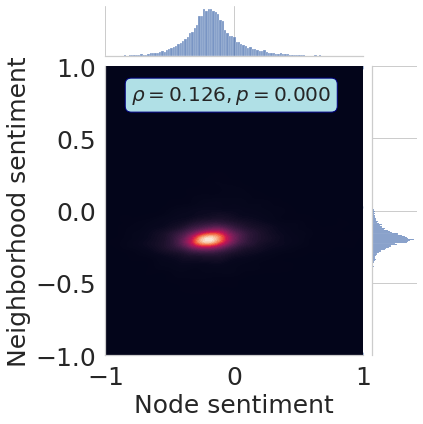

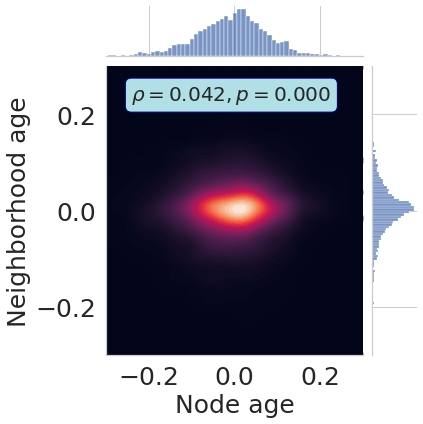

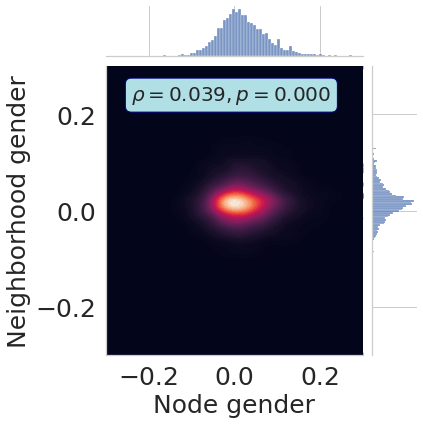

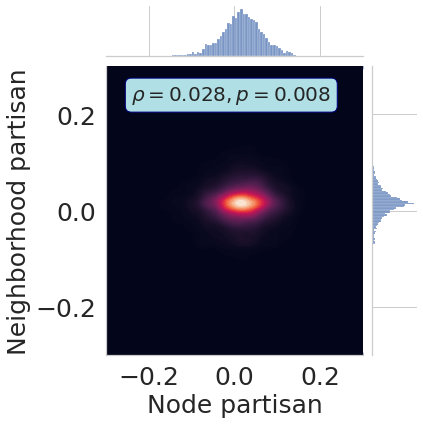

In [36]:
plot_for_scores(france_info_war,'sentiment',[-1,1])
plot_for_scores(france_scores_info_war,'age',[-.3,.3])
plot_for_scores(france_scores_info_war,'gender',[-.3,.3])
plot_for_scores(france_scores_info_war,'partisan',[-.3,.3])

In [37]:
count_war = comments_sentiment[['author','is_war']].groupby(by='author').sum(numeric_only=True)
user_total_scores_upd = pd.merge(left=scores_users,right=user_sentiment,how='inner',left_on= 'author', right_index=True)
user_total_scores_upd = pd.merge(left=user_total_scores_upd,right=count_war,how='inner',left_on= 'author', right_index=True)

In [38]:
user_total_scores_upd

,author,age,gender,partisan,count,score,is_war_x,created_utc_y,negative_sentiment,positive_sentiment,sentiment,is_war_y
0,--Faris--,-0.179800,0.032614,0.072516,74,4.000000,0.000000,1.649110e+09,0.254891,0.612561,0.357670,0
1,--Spleen--,-0.023907,0.090530,-0.028494,19,-1.666667,0.000000,1.647785e+09,0.341540,0.489071,0.147531,0
2,--lizzie--,-0.013741,0.113848,-0.036685,88,2.384615,0.000000,1.652866e+09,0.476417,0.256044,-0.220374,0
3,-Aalex,-0.485285,-0.001116,0.083223,28,1.500000,0.000000,1.649529e+09,0.211254,0.572980,0.361726,0
4,-AbbattiS-,-0.099032,0.078928,0.014164,107,0.000000,0.000000,1.664172e+09,0.471504,0.284007,-0.187497,0
...,...,...,...,...,...,...,...,...,...,...,...,...
35785,zyssai,0.018760,-0.050294,0.014433,221,2.846154,0.000000,1.656677e+09,0.394064,0.412516,0.018452,0
35786,zythologist,0.081479,-0.076764,0.016538,1,11.076923,0.076923,1.657208e+09,0.410250,0.337994,-0.072255,1
35787,zzav2,0.075148,0.049036,0.032352,12,0.416667,0.166667,1.664171e+09,0.427590,0.378715,-0.048875,2
35788,zzseska777,0.089079,-0.073024,0.013648,13,1.000000,0.000000,1.655238e+09,0.705966,0.138623,-0.567344,0


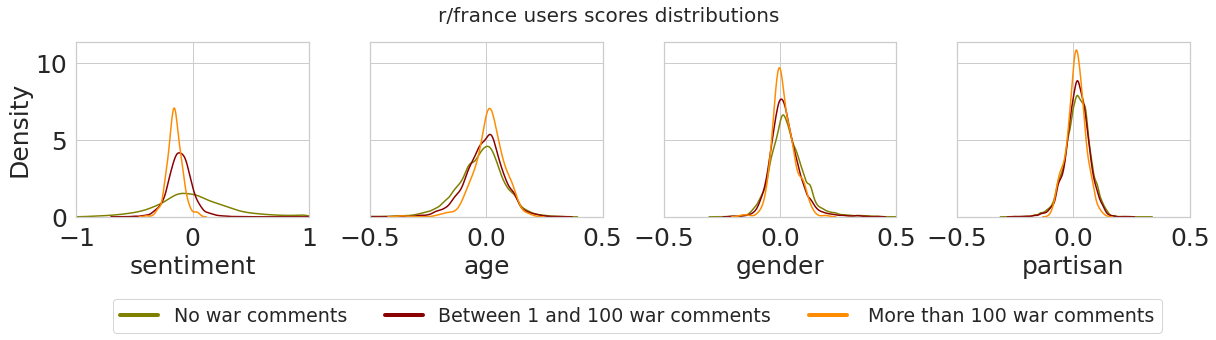

In [39]:
#plot_histograms(user_total_scores_upd,user_total_scores_war_upd,'France users scores distributions')
plt.rc('axes', labelsize=25) #fontsize of the x and y labels
plt.rc('xtick', labelsize=25) #fontsize of the x tick labels
plt.rc('ytick', labelsize=25) #fontsize of the y tick labels
plt.rc('legend', fontsize=19) #fontsize of the legend
custom_line = [Line2D([0], [0], color='olive', lw=4), Line2D([0], [0], color='darkred', lw=4), Line2D([0], [0], color='darkorange', lw=4)]

plot_histograms('r/france users scores distributions',['No war comments','Between 1 and 100 war comments',' More than 100 war comments'],custom_line,user_total_scores_upd[user_total_scores_upd['is_war_y']<1],user_total_scores_upd[(user_total_scores_upd['is_war_y']>1) & (user_total_scores_upd['is_war_y']<100)],user_total_scores_upd[user_total_scores_upd['is_war_y']>100])


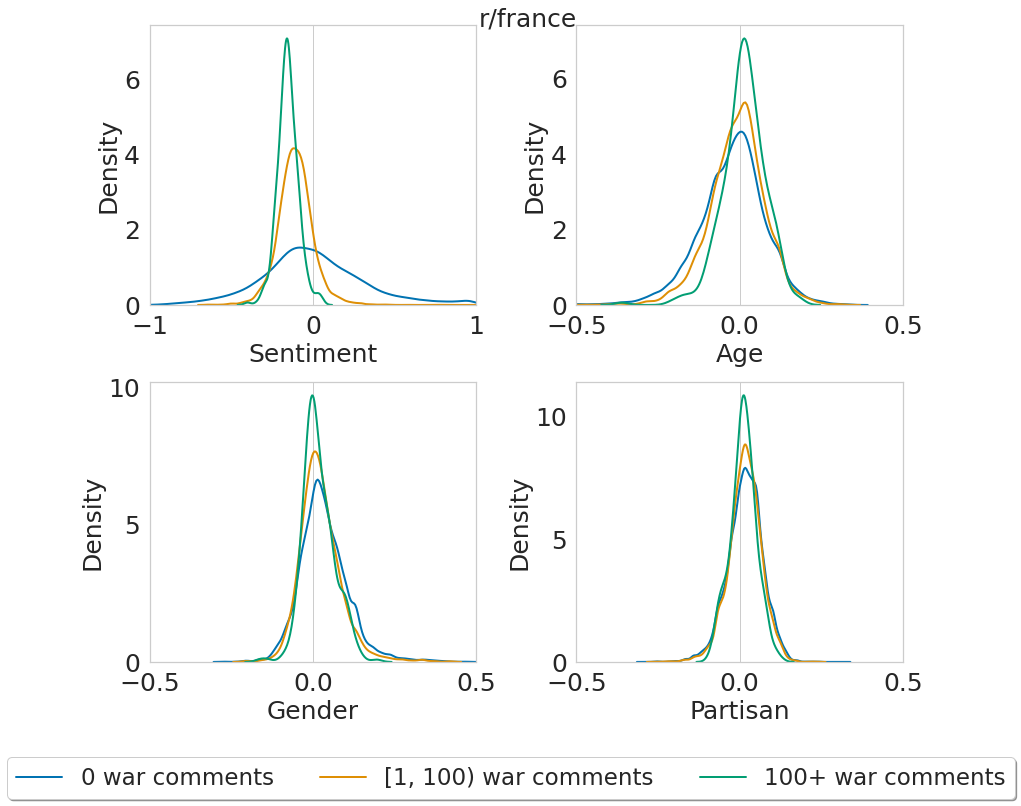

In [41]:
dfs = [user_total_scores_upd[user_total_scores_upd['is_war_y']<1],user_total_scores_upd[(user_total_scores_upd['is_war_y']>1) & (user_total_scores_upd['is_war_y']<100)],user_total_scores_upd[user_total_scores_upd['is_war_y']>100]]

labels = ['0 war comments','[1, 100) war comments','100+ war comments']
topics = ['sentiment','age','gender','partisan']
colors= sns.color_palette("colorblind", 3)
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
plt.rc('legend', fontsize=23) #fontsize of the legend
i=0
j=0
for topic in topics: 
    if j == 2:
        i = 1
        j = 0
    if topic != 'sentiment': 
        xlimt=[-0.5,0.5]
    else:
        xlimt = [-1, 1]
    ax = axs[i][j]
    ax.yaxis.get_major_locator().set_params(integer=True)
    c = 0
    for df in dfs:      
        sns.kdeplot(data=df, x=topic, color=colors[c],ax=ax,fill=False,
                    label = labels[c],linewidth=2)
        c += 1
    ax.set_xlim(xlimt[0],xlimt[1])
    ax.set_xticks([xlimt[0],(xlimt[0]+xlimt[1])/2,xlimt[1]])
#    ax.set_xticks([])
    ax.set_xlabel(topic.capitalize())
    j += 1
    ax.yaxis.grid(False)
plt.tight_layout()
#plt.suptitle(title,fontsize=20)
box = ax.get_position()
#ax.set_position([box.x0, box.y0 + box.height * 0.1,
#                 box.width, box.height * 0.9])

plt.suptitle("r/france",y=1.01,x=0.53,fontsize=25)
# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(-0.2, -0.3),
          fancybox=True, shadow=True, ncol=3)
# plt.tight_layout()
#fig.legend(custom_lines,labels, bbox_to_anchor=[0.96, 0],ncols=3)
